# Advancement on Groundouts, DP, and FC
During a play, it is decided whether it will be a groundout, flyout, or hit. This notebook encompasses all of the possibilities after a groundout has been decided.

This notebook is only meant to validate the association of which rolls go with which outcomes.
Formula derivations and messing with those can be done in groundout_dp.ipynb, groundout_sac.ipynb, groundout_advance.ipynb

There are three formulas needed:
```python
df["threshold_advance"] = 0.50 
                        + 0.35 * df[f"runner_on_{base}_indulgence_with_vibe"] 
                        - 0.10 * df["fielder_tenaciousness_with_vibe"] 
                        - 0.10 * (df["ballpark_inconvenience"] - 0.50) 
                        - 0.10 * (df["ballpark_elongation"] - 0.50)
df["threshold_doubleplay"] = -0.05
                            + 0.40 * df["pitcher_shakespearianism_with_vibe"]
                            - 0.18 * df["batter_inv_tragicness"]
                            + 0.10 * df['fielder_tenaciousness_with_vibe']
                            - 0.16 * (df["ballpark_elongation"] - 0.5)

df["threshold_martyr"] = 0.05 
                       + 0.25 * df["batter_martyrdom"]

dfc.loc[dfc["threshold_rounded"] < 0.001, "threshold_rounded"] = 0.001
```


In [73]:
# Load Dataframe

import glob

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import CARETLEFTBASE, CARETRIGHTBASE

all_files = glob.glob("../roll_data/*-groundout.csv")

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

seasons = [11,12,13,14]
# seasons = [11]
df = df[df['season'].isin(seasons)]

# Up to 5 rolls for groundouts, so split them up here
print(df['roll'])
df['roll'] = df['roll'].apply(lambda x: x[1:-1].split(','))
splitrolls = pd.DataFrame(df['roll'].to_list(), columns = ['roll1','roll2','roll3','roll4','roll5'], index = df.index)
df[['roll1','roll2','roll3','roll4','roll5']] = splitrolls
df[['roll1','roll2','roll3','roll4','roll5']] = df[['roll1','roll2','roll3','roll4','roll5']].apply(pd.to_numeric)

len(df)

/tmp/ipykernel_6203/2399025185.py:12: DtypeWarning: Columns (114,132) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)


0                                                       []
1                                                       []
2                                                       []
3                                                       []
4        [0.8045275831407417, 0.09609544796707459, 0.81...
                               ...                        
70566                                                   []
70567                                                   []
70568                                                   []
70569                                                   []
70570             [0.7085249032752499, 0.6223138306812654]
Name: roll, Length: 70571, dtype: object


70571

In [74]:
# Vibes

df.loc[df["pitcher_mods"].astype(str).str.contains("SCATTERED"), "pitcher_vibes"] = 0
df.loc[df["batter_mods"].astype(str).str.contains("SCATTERED"), "batter_vibes"] = 0
df.loc[df["fielder_mods"].astype(str).str.contains("SCATTERED"), "fielder_vibes"] = 0
df.loc[df["runner_on_first_mods"].astype(str).str.contains("SCATTERED"), "runner_on_first_vibes"] = 0
df.loc[df["runner_on_second_mods"].astype(str).str.contains("SCATTERED"), "runner_on_second_vibes"] = 0
df.loc[df["runner_on_third_mods"].astype(str).str.contains("SCATTERED"), "runner_on_third_vibes"] = 0

df['batter_inv_patheticism'] = 1-df['batter_patheticism']/df["batter_multiplier"]
df['batter_inv_patheticism_with_vibe'] = df['batter_inv_patheticism'] * (1 + 0.2*df['batter_vibes'])
df['batter_inv_tragicness'] = 1-df['batter_tragicness']/df["batter_multiplier"]
df['batter_inv_tragicness_with_vibe'] = df['batter_inv_tragicness'] * (1 + 0.2*df['batter_vibes'])
for attr in [
    "batter_buoyancy",
    "batter_divinity",
    "batter_martyrdom",
    "batter_moxie",
    "batter_musclitude",
    "batter_patheticism",
    "batter_thwackability",
    "batter_tragicness",
    "batter_coldness",
    "batter_overpowerment",
    "batter_ruthlessness",
    "batter_shakespearianism",
    "batter_suppression",
    "batter_unthwackability",
    "batter_base_thirst",
    "batter_continuation",
    "batter_ground_friction",
    "batter_indulgence",
    "batter_laserlikeness",
    "batter_anticapitalism",
    "batter_chasiness",
    "batter_omniscience",
    "batter_tenaciousness",
    "batter_watchfulness",
    "batter_pressurization",
    "batter_cinnamon",
]:
    df[attr + "_scaled"] = df[attr] * df["batter_multiplier"]
    df[attr + "_with_vibe"] = df[attr + "_scaled"] * (1 + 0.2 * df["batter_vibes"])
df = df.copy()

for base in ["first","second","third","third_hh"]:
    for attr in [
        f"runner_on_{base}_base_thirst",
        f"runner_on_{base}_continuation",
        f"runner_on_{base}_ground_friction",
        f"runner_on_{base}_indulgence",
        f"runner_on_{base}_laserlikeness",
    ]:
        df[attr + "_scaled"] = df[attr] * df[f"runner_on_{base}_multiplier"]
        df[attr + "_with_vibe"] = df[attr + "_scaled"] * (1 + 0.2 * df[f"runner_on_{base}_vibes"])
df = df.copy()

for attr in [
    "pitcher_buoyancy",
    "pitcher_divinity",
    "pitcher_martyrdom",
    "pitcher_moxie",
    "pitcher_musclitude",
    "pitcher_patheticism",
    "pitcher_thwackability",
    "pitcher_tragicness",
    "pitcher_ruthlessness",
    "pitcher_overpowerment",
    "pitcher_unthwackability",
    "pitcher_shakespearianism",
    "pitcher_suppression",
    "pitcher_coldness",
    "pitcher_base_thirst",
    "pitcher_continuation",
    "pitcher_ground_friction",
    "pitcher_indulgence",
    "pitcher_laserlikeness",
    "pitcher_anticapitalism",
    "pitcher_chasiness",
    "pitcher_omniscience",
    "pitcher_tenaciousness",
    "pitcher_watchfulness",
    "pitcher_pressurization",
    "pitcher_cinnamon",
]:
    df[attr + "_scaled"] = df[attr] * df["pitcher_multiplier"]
    df[attr + "_with_vibe"] = df[attr + "_scaled"] * (1 + 0.2 * df["pitcher_vibes"])
df = df.copy()


for attr in [
    "fielder_anticapitalism",
    "fielder_chasiness",
    "fielder_omniscience",
    "fielder_tenaciousness",
    "fielder_watchfulness",
]:
    df[attr + "_scaled"] = df[attr] * df["fielder_multiplier"]
    df[attr + "_with_vibe"] = df[attr + "_scaled"] * (1 + 0.2 * df["fielder_vibes"])
df = df.copy()

len(df)

70571

In [75]:
# Ignore multipliers and some mods

# for exclude_mod in ["OVERPERFORMING", "UNDERPERFORMING", "HIGH_PRESSURE", "GROWTH", "SINKING_SHIP", "TRAVELING"]:
for exclude_mod in ["FLINCH", "O_NO", "ON_FIRE", "GROWTH", "TRAVELING", "SHELLED"]:
    df = df[~df["batter_mods"].astype(str).str.contains(exclude_mod)]
    df = df[~df["pitcher_mods"].astype(str).str.contains(exclude_mod)]
    df = df[~df["fielder_mods"].astype(str).str.contains(exclude_mod)]
    df = df[~df["runner_on_first_mods"].astype(str).str.contains(exclude_mod)]
    df = df[~df["runner_on_second_mods"].astype(str).str.contains(exclude_mod)]
    df = df[~df["runner_on_third_mods"].astype(str).str.contains(exclude_mod)]
    df = df[~df["runner_on_third_hh_mods"].astype(str).str.contains(exclude_mod)]
    df = df[~df["pitching_team_mods"].astype(str).str.contains(exclude_mod)]
    df = df[~df["batting_team_mods"].astype(str).str.contains(exclude_mod)]

df = df[
    (df["pitcher_multiplier"] == 1)
    & (df["batter_multiplier"] == 1)
    & (df["fielder_multiplier"] == 1)
    & (df["runner_on_first_multiplier"] == 1)
    & (df["runner_on_second_multiplier"] == 1)
    & (df["runner_on_third_multiplier"] == 1)
    & (df["runner_on_third_hh_multiplier"] == 1)
]

print(len(df))

42560


# Begin Selection

In [76]:
n_outliers = 0

## Runner on First

### [0] -> []
DP (pass), DP Where (unused)

707
True    707
Name: guess, dtype: int64


,threshold_dp,roll1,event_type,inning,batter_name,batter_mods,batting_team_mods,fielder_name,fielder_mods,pitcher_name,pitcher_mods,pitching_team_mods,season,day,game_id,play_count


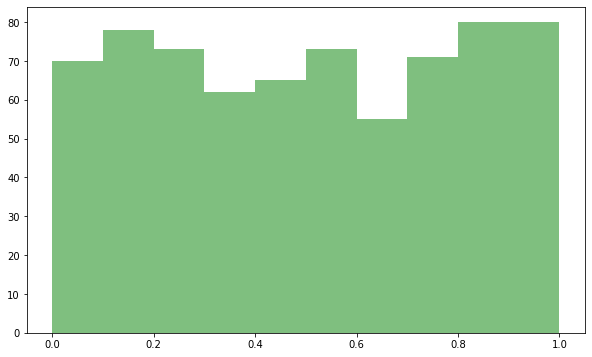

In [77]:
# Define selection based on initial runners
# Baserunners are a string, not list, because pandas doesn't like lists.
dfc = df[df['baserunners'] == "[0]"]
# Define the final state runners as well
dfc = dfc[dfc['baserunners_next'] == "[]"]
print(len(dfc))

# Make thresholds
dfc["threshold_martyr"] = 0.05 + 0.25 * dfc["batter_martyrdom"]
dfc["threshold_dp"] = -0.05 + 0.40 * dfc["pitcher_shakespearianism_with_vibe"] - 0.18 * dfc["batter_inv_tragicness"] + 0.10 * dfc['fielder_tenaciousness_with_vibe'] - 0.16 * (dfc["ballpark_elongation"] - 0.5)
dfc["threshold_advance_first"] = 0.50 + 0.35 * dfc["runner_on_first_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_second"] = 0.50 + 0.35 * dfc["runner_on_second_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third"] = 0.50 + 0.35 * dfc["runner_on_third_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third_hh"] = 0.50 + 0.35 * dfc["runner_on_third_hh_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]] = dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]].clip(lower=0.001, axis="columns")

# Prove what we think is correct
dfc["guess"] = dfc["roll1"] < dfc["threshold_dp"]
print(dfc["guess"].value_counts()) # If all True, we're right.

# Plot unused rolls
fig, ax = plt.subplots(1, figsize=(10, 6), facecolor='white')
ax.hist(
    dfc['roll2'],
    bins=10,
    range=[0.,1.],
    color="green",
    alpha = 0.5
)

# Print Outliers
outliers = dfc[~dfc["guess"]]
n_outliers += len(outliers)
outliers[
    [
        "threshold_dp",
        "roll1",
        "event_type",
        "inning",
        "batter_name",
        "batter_mods",
        "batting_team_mods",
        "fielder_name",
        "fielder_mods",
        "pitcher_name",
        "pitcher_mods",
        "pitching_team_mods",
        "season",
        "day",
        "game_id",
        "play_count",
    ]
]



### [0] -> [0]
DP (fail), Martyr (fail)

4143
True    4143
Name: guess, dtype: int64


,threshold_dp,roll1,event_type,inning,batter_name,batter_mods,batting_team_mods,fielder_name,fielder_mods,pitcher_name,pitcher_mods,pitching_team_mods,season,day,game_id,play_count


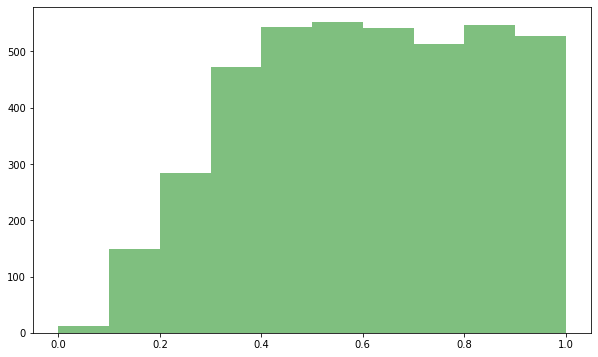

In [78]:
# Define selection based on initial runners
# Baserunners are a string, not list, because pandas doesn't like lists.
dfc = df[df['baserunners'] == "[0]"]
# Define the final state runners as well
dfc = dfc[dfc['baserunners_next'] == "[0]"]
print(len(dfc))

# Make thresholds
dfc["threshold_martyr"] = 0.05 + 0.25 * dfc["batter_martyrdom"]
dfc["threshold_dp"] = -0.05 + 0.40 * dfc["pitcher_shakespearianism_with_vibe"] - 0.18 * dfc["batter_inv_tragicness"] + 0.10 * dfc['fielder_tenaciousness_with_vibe'] - 0.16 * (dfc["ballpark_elongation"] - 0.5)
dfc["threshold_advance_first"] = 0.50 + 0.35 * dfc["runner_on_first_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_second"] = 0.50 + 0.35 * dfc["runner_on_second_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third"] = 0.50 + 0.35 * dfc["runner_on_third_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third_hh"] = 0.50 + 0.35 * dfc["runner_on_third_hh_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]] = dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]].clip(lower=0.001, axis="columns")

# Prove what we think is correct
dfc["guess"] = (dfc["roll1"] > dfc["threshold_dp"]) & (dfc["roll2"] > dfc["threshold_martyr"])
print(dfc["guess"].value_counts()) # If all True, we're right.

# Plot unused rolls
fig, ax = plt.subplots(1, figsize=(10, 6), facecolor='white')
ax.hist(
    dfc['roll2'],
    bins=10,
    range=[0.,1.],
    color="green",
    alpha = 0.5
)

# Print Outliers
outliers = dfc[~dfc["guess"]]
n_outliers += len(outliers)
outliers[
    [
        "threshold_dp",
        "roll1",
        "event_type",
        "inning",
        "batter_name",
        "batter_mods",
        "batting_team_mods",
        "fielder_name",
        "fielder_mods",
        "pitcher_name",
        "pitcher_mods",
        "pitching_team_mods",
        "season",
        "day",
        "game_id",
        "play_count",
    ]
]

### [0] -> [1]
DP (fail), Martyr (pass), ??? (unused)

1172
True    1172
Name: guess, dtype: int64


,threshold_dp,roll1,event_type,inning,batter_name,batter_mods,batting_team_mods,fielder_name,fielder_mods,pitcher_name,pitcher_mods,pitching_team_mods,season,day,game_id,play_count


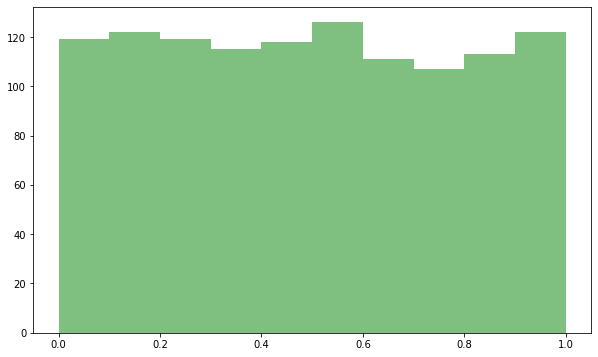

In [79]:
# Define selection based on initial runners
# Baserunners are a string, not list, because pandas doesn't like lists.
dfc = df[df['baserunners'] == "[0]"]
# Define the final state runners as well
dfc = dfc[dfc['baserunners_next'] == "[1]"]
print(len(dfc))

# Make thresholds
dfc["threshold_martyr"] = 0.05 + 0.25 * dfc["batter_martyrdom"]
dfc["threshold_dp"] = -0.05 + 0.40 * dfc["pitcher_shakespearianism_with_vibe"] - 0.18 * dfc["batter_inv_tragicness"] + 0.10 * dfc['fielder_tenaciousness_with_vibe'] - 0.16 * (dfc["ballpark_elongation"] - 0.5)
dfc["threshold_advance_first"] = 0.50 + 0.35 * dfc["runner_on_first_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_second"] = 0.50 + 0.35 * dfc["runner_on_second_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third"] = 0.50 + 0.35 * dfc["runner_on_third_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third_hh"] = 0.50 + 0.35 * dfc["runner_on_third_hh_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]] = dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]].clip(lower=0.001, axis="columns")

# Prove what we think is correct
dfc["guess"] = (dfc["roll1"] > dfc["threshold_dp"]) & (dfc["roll2"] < dfc["threshold_martyr"])
print(dfc["guess"].value_counts()) # If all True, we're right.

# Plot unused rolls
fig, ax = plt.subplots(1, figsize=(10, 6), facecolor='white')
ax.hist(
    dfc['roll3'],
    bins=10,
    range=[0.,1.],
    color="green",
    alpha = 0.5
)

# Print Outliers
outliers = dfc[~dfc["guess"]]
n_outliers += len(outliers)
outliers[
    [
        "threshold_dp",
        "roll1",
        "event_type",
        "inning",
        "batter_name",
        "batter_mods",
        "batting_team_mods",
        "fielder_name",
        "fielder_mods",
        "pitcher_name",
        "pitcher_mods",
        "pitching_team_mods",
        "season",
        "day",
        "game_id",
        "play_count",
    ]
]

## Runner on Second

### [1] -> [1]
DP (unused), Advance (fail)

767
True     766
False      1
Name: guess, dtype: int64


,threshold_advance_second,roll2,event_type,inning,runner_on_second_name,runner_on_second_mods,batting_team_mods,fielder_name,fielder_mods,pitching_team_mods,season,day,game_id,play_count
65634,0.685746,0.592281,groundout,4,Squid Galvanic,NaN,CARCINIZATION;UNHOLEY,Bates Bentley,NaN,SINKING_SHIP,14,75,53e9c83e-5320-461a-a1bc-4a947edfaeff,153


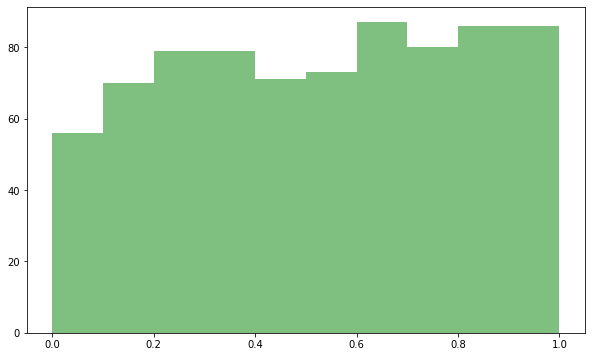

In [80]:
# Define selection based on initial runners
# Baserunners are a string, not list, because pandas doesn't like lists.
dfc = df[df['baserunners'] == "[1]"]
# Define the final state runners as well
dfc = dfc[dfc['baserunners_next'] == "[1]"]
print(len(dfc))

# Make thresholds
dfc["threshold_martyr"] = 0.05 + 0.25 * dfc["batter_martyrdom"]
dfc["threshold_dp"] = -0.05 + 0.40 * dfc["pitcher_shakespearianism_with_vibe"] - 0.18 * dfc["batter_inv_tragicness"] + 0.10 * dfc['fielder_tenaciousness_with_vibe'] - 0.16 * (dfc["ballpark_elongation"] - 0.5)
dfc["threshold_advance_first"] = 0.50 + 0.35 * dfc["runner_on_first_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_second"] = 0.50 + 0.35 * dfc["runner_on_second_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third"] = 0.50 + 0.35 * dfc["runner_on_third_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third_hh"] = 0.50 + 0.35 * dfc["runner_on_third_hh_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]] = dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]].clip(lower=0.001, axis="columns")

# Prove what we think is correct
dfc["guess"] = (dfc["roll2"] > dfc["threshold_advance_second"])
print(dfc["guess"].value_counts()) # If all True, we're right.

# Plot unused rolls
fig, ax = plt.subplots(1, figsize=(10, 6), facecolor='white')
ax.hist(
    dfc['roll1'],
    bins=10,
    range=[0.,1.],
    color="green",
    alpha = 0.5
)

# Print Outliers
outliers = dfc[~dfc["guess"]]
n_outliers += len(outliers)
outliers[
    [
        "threshold_advance_second",
        "roll2",
        "event_type",
        "inning",
        "runner_on_second_name",
        "runner_on_second_mods",
        "batting_team_mods",
        "fielder_name",
        "fielder_mods",
        "pitching_team_mods",
        "season",
        "day",
        "game_id",
        "play_count",
    ]
]

### [1] -> [2]
DP (unused), Advance (pass)

1450
True    1450
Name: guess, dtype: int64


,threshold_advance_second,roll2,event_type,inning,batter_name,batter_mods,batting_team_mods,fielder_name,fielder_mods,pitcher_name,pitcher_mods,pitching_team_mods,season,day,game_id,play_count


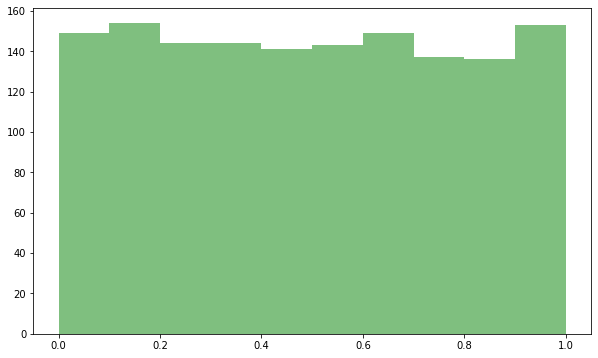

In [81]:
# Define selection based on initial runners
# Baserunners are a string, not list, because pandas doesn't like lists.
dfc = df[df['baserunners'] == "[1]"]
# Define the final state runners as well
dfc = dfc[dfc['baserunners_next'] == "[2]"]
print(len(dfc))

# Make thresholds
dfc["threshold_martyr"] = 0.05 + 0.25 * dfc["batter_martyrdom"]
dfc["threshold_dp"] = -0.05 + 0.40 * dfc["pitcher_shakespearianism_with_vibe"] - 0.18 * dfc["batter_inv_tragicness"] + 0.10 * dfc['fielder_tenaciousness_with_vibe'] - 0.16 * (dfc["ballpark_elongation"] - 0.5)
dfc["threshold_advance_first"] = 0.50 + 0.35 * dfc["runner_on_first_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_second"] = 0.50 + 0.35 * dfc["runner_on_second_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third"] = 0.50 + 0.35 * dfc["runner_on_third_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third_hh"] = 0.50 + 0.35 * dfc["runner_on_third_hh_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]] = dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]].clip(lower=0.001, axis="columns")

# Prove what we think is correct
dfc["guess"] = (dfc["roll2"] < dfc["threshold_advance_second"])
print(dfc["guess"].value_counts()) # If all True, we're right.

# Plot unused rolls
fig, ax = plt.subplots(1, figsize=(10, 6), facecolor='white')
ax.hist(
    dfc['roll1'],
    bins=10,
    range=[0.,1.],
    color="green",
    alpha = 0.5
)

# Print Outliers
outliers = dfc[~dfc["guess"]]
n_outliers += len(outliers)
outliers[
    [
        "threshold_advance_second",
        "roll2",
        "event_type",
        "inning",
        "batter_name",
        "batter_mods",
        "batting_team_mods",
        "fielder_name",
        "fielder_mods",
        "pitcher_name",
        "pitcher_mods",
        "pitching_team_mods",
        "season",
        "day",
        "game_id",
        "play_count",
    ]
]

## Runner on Third

### [2] -> []
DP (unused), Advance (pass)

1065
True    1065
Name: guess, dtype: int64


,threshold_advance_second,roll2,event_type,inning,batter_name,batter_mods,batting_team_mods,fielder_name,fielder_mods,pitcher_name,pitcher_mods,pitching_team_mods,season,day,game_id,play_count


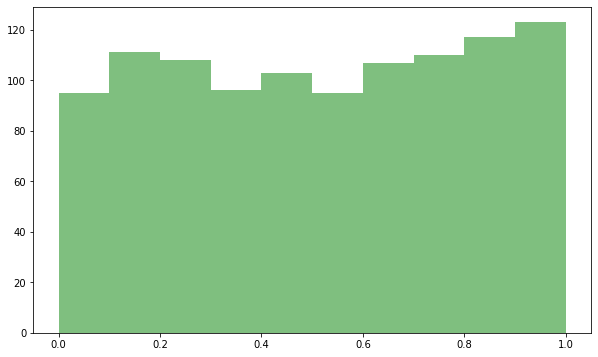

In [82]:
# Define selection based on initial runners
# Baserunners are a string, not list, because pandas doesn't like lists.
dfc = df[df['baserunners'] == "[2]"]
# Define the final state runners as well
dfc = dfc[dfc['baserunners_next'] == "[]"]
print(len(dfc))

# Make thresholds
dfc["threshold_martyr"] = 0.05 + 0.25 * dfc["batter_martyrdom"]
dfc["threshold_dp"] = -0.05 + 0.40 * dfc["pitcher_shakespearianism_with_vibe"] - 0.18 * dfc["batter_inv_tragicness"] + 0.10 * dfc['fielder_tenaciousness_with_vibe'] - 0.16 * (dfc["ballpark_elongation"] - 0.5)
dfc["threshold_advance_first"] = 0.50 + 0.35 * dfc["runner_on_first_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_second"] = 0.50 + 0.35 * dfc["runner_on_second_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third"] = 0.50 + 0.35 * dfc["runner_on_third_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third_hh"] = 0.50 + 0.35 * dfc["runner_on_third_hh_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]] = dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]].clip(lower=0.001, axis="columns")

# Prove what we think is correct
dfc["guess"] = (dfc["roll2"] < dfc["threshold_advance_third"])
print(dfc["guess"].value_counts()) # If all True, we're right.

# Plot unused rolls
fig, ax = plt.subplots(1, figsize=(10, 6), facecolor='white')
ax.hist(
    dfc['roll1'],
    bins=10,
    range=[0.,1.],
    color="green",
    alpha = 0.5
)

# Print Outliers
outliers = dfc[~dfc["guess"]]
n_outliers += len(outliers)
outliers[
    [
        "threshold_advance_second",
        "roll2",
        "event_type",
        "inning",
        "batter_name",
        "batter_mods",
        "batting_team_mods",
        "fielder_name",
        "fielder_mods",
        "pitcher_name",
        "pitcher_mods",
        "pitching_team_mods",
        "season",
        "day",
        "game_id",
        "play_count",
    ]
]

### [2] -> [2]
DP (unused), Advance (fail)

448
True    448
Name: guess, dtype: int64


,threshold_advance_second,roll2,event_type,inning,batter_name,batter_mods,batting_team_mods,fielder_name,fielder_mods,pitcher_name,pitcher_mods,pitching_team_mods,season,day,game_id,play_count


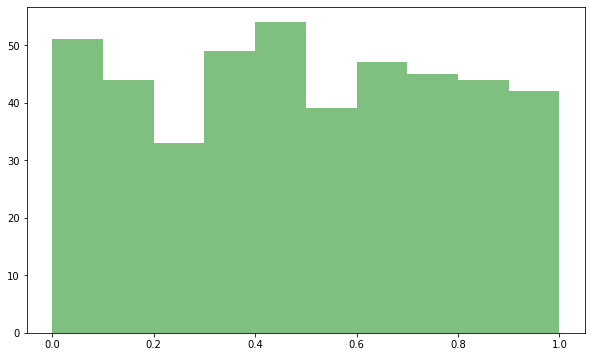

In [83]:
# Define selection based on initial runners
# Baserunners are a string, not list, because pandas doesn't like lists.
dfc = df[df['baserunners'] == "[2]"]
# Define the final state runners as well
dfc = dfc[dfc['baserunners_next'] == "[2]"]
print(len(dfc))

# Make thresholds
dfc["threshold_martyr"] = 0.05 + 0.25 * dfc["batter_martyrdom"]
dfc["threshold_dp"] = -0.05 + 0.40 * dfc["pitcher_shakespearianism_with_vibe"] - 0.18 * dfc["batter_inv_tragicness"] + 0.10 * dfc['fielder_tenaciousness_with_vibe'] - 0.16 * (dfc["ballpark_elongation"] - 0.5)
dfc["threshold_advance_first"] = 0.50 + 0.35 * dfc["runner_on_first_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_second"] = 0.50 + 0.35 * dfc["runner_on_second_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third"] = 0.50 + 0.35 * dfc["runner_on_third_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third_hh"] = 0.50 + 0.35 * dfc["runner_on_third_hh_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]] = dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]].clip(lower=0.001, axis="columns")

# Prove what we think is correct
dfc["guess"] = (dfc["roll2"] > dfc["threshold_advance_third"])
print(dfc["guess"].value_counts()) # If all True, we're right.

# Plot unused rolls
fig, ax = plt.subplots(1, figsize=(10, 6), facecolor='white')
ax.hist(
    dfc['roll1'],
    bins=10,
    range=[0.,1.],
    color="green",
    alpha = 0.5
)

# Print Outliers
outliers = dfc[~dfc["guess"]]
n_outliers += len(outliers)
outliers[
    [
        "threshold_advance_second",
        "roll2",
        "event_type",
        "inning",
        "batter_name",
        "batter_mods",
        "batting_team_mods",
        "fielder_name",
        "fielder_mods",
        "pitcher_name",
        "pitcher_mods",
        "pitching_team_mods",
        "season",
        "day",
        "game_id",
        "play_count",
    ]
]

## Runners on First and Second

### [1, 0] -> []
DP (pass), DP Where (unused)

83
True    83
Name: guess, dtype: int64


,threshold_dp,roll1,event_type,inning,batter_name,batter_mods,batting_team_mods,fielder_name,fielder_mods,pitcher_name,pitcher_mods,pitching_team_mods,season,day,game_id,play_count


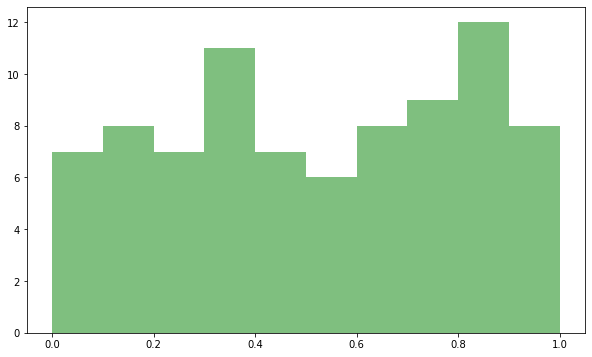

In [84]:
# Define selection based on initial runners
# Baserunners are a string, not list, because pandas doesn't like lists.
dfc = df[df['baserunners'] == "[1, 0]"]
# Define the final state runners as well
dfc = dfc[dfc['baserunners_next'] == "[]"]
print(len(dfc))

# Make thresholds
dfc["threshold_martyr"] = 0.05 + 0.25 * dfc["batter_martyrdom"]
dfc["threshold_dp"] = -0.05 + 0.40 * dfc["pitcher_shakespearianism_with_vibe"] - 0.175 * dfc["batter_inv_tragicness"] + 0.10 * dfc['fielder_tenaciousness_with_vibe'] - 0.175 * (dfc["ballpark_elongation"] - 0.5)
dfc["threshold_advance_first"] = 0.50 + 0.35 * dfc["runner_on_first_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_second"] = 0.50 + 0.35 * dfc["runner_on_second_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third"] = 0.50 + 0.35 * dfc["runner_on_third_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third_hh"] = 0.50 + 0.35 * dfc["runner_on_third_hh_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]] = dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]].clip(lower=0.001, axis="columns")

# Prove what we think is correct
dfc["guess"] = (dfc["roll1"] < dfc["threshold_dp"])
print(dfc["guess"].value_counts()) # If all True, we're right.

# Plot unused rolls
fig, ax = plt.subplots(1, figsize=(10, 6), facecolor='white')
ax.hist(
    dfc['roll2'],
    bins=10,
    range=[0.,1.],
    color="green",
    alpha = 0.5
)

# Print Outliers
outliers = dfc[~dfc["guess"]]
n_outliers += len(outliers)
outliers[
    [
        "threshold_dp",
        "roll1",
        "event_type",
        "inning",
        "batter_name",
        "batter_mods",
        "batting_team_mods",
        "fielder_name",
        "fielder_mods",
        "pitcher_name",
        "pitcher_mods",
        "pitching_team_mods",
        "season",
        "day",
        "game_id",
        "play_count",
    ]
]

### [1, 0] -> [1]
DP (pass), DP Where < 1/2

In [85]:
# Define selection based on initial runners
# Baserunners are a string, not list, because pandas doesn't like lists.
dfc = df[df['baserunners'] == "[1, 0]"]
# Define the final state runners as well
dfc = dfc[dfc['baserunners_next'] == "[1]"]
print(len(dfc))

# Make thresholds
dfc["threshold_martyr"] = 0.05 + 0.25 * dfc["batter_martyrdom"]
dfc["threshold_dp"] = -0.05 + 0.40 * dfc["pitcher_shakespearianism_with_vibe"] - 0.18 * dfc["batter_inv_tragicness"] + 0.10 * dfc['fielder_tenaciousness_with_vibe'] - 0.16 * (dfc["ballpark_elongation"] - 0.5)
dfc["threshold_advance_first"] = 0.50 + 0.35 * dfc["runner_on_first_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_second"] = 0.50 + 0.35 * dfc["runner_on_second_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third"] = 0.50 + 0.35 * dfc["runner_on_third_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third_hh"] = 0.50 + 0.35 * dfc["runner_on_third_hh_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]] = dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]].clip(lower=0.001, axis="columns")

# Prove what we think is correct
dfc["guess"] = (dfc["roll1"] < dfc["threshold_dp"]) & (dfc["roll2"] < 1/2)
print(dfc["guess"].value_counts()) # If all True, we're right.

# Print Outliers
outliers = dfc[~dfc["guess"]]
n_outliers += len(outliers)
outliers[
    [
        "threshold_advance_second",
        "roll2",
        "event_type",
        "inning",
        "batter_name",
        "batter_mods",
        "batting_team_mods",
        "fielder_name",
        "fielder_mods",
        "pitcher_name",
        "pitcher_mods",
        "pitching_team_mods",
        "season",
        "day",
        "game_id",
        "play_count",
    ]
]

26
True    26
Name: guess, dtype: int64


,threshold_advance_second,roll2,event_type,inning,batter_name,batter_mods,batting_team_mods,fielder_name,fielder_mods,pitcher_name,pitcher_mods,pitching_team_mods,season,day,game_id,play_count


### [1, 0] -> [2]
DP (pass), DP Where > 1/2

In [86]:
# Define selection based on initial runners
# Baserunners are a string, not list, because pandas doesn't like lists.
dfc = df[df['baserunners'] == "[1, 0]"]
# Define the final state runners as well
dfc = dfc[dfc['baserunners_next'] == "[2]"]
print(len(dfc))

# Make thresholds
dfc["threshold_martyr"] = 0.05 + 0.25 * dfc["batter_martyrdom"]
dfc["threshold_dp"] = -0.05 + 0.40 * dfc["pitcher_shakespearianism_with_vibe"] - 0.18 * dfc["batter_inv_tragicness"] + 0.10 * dfc['fielder_tenaciousness_with_vibe'] - 0.16 * (dfc["ballpark_elongation"] - 0.5)
dfc["threshold_advance_first"] = 0.50 + 0.35 * dfc["runner_on_first_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_second"] = 0.50 + 0.35 * dfc["runner_on_second_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third"] = 0.50 + 0.35 * dfc["runner_on_third_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third_hh"] = 0.50 + 0.35 * dfc["runner_on_third_hh_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]] = dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]].clip(lower=0.001, axis="columns")

# Prove what we think is correct
dfc["guess"] = (dfc["roll1"] < dfc["threshold_dp"]) & (dfc["roll2"] > 1/2)
print(dfc["guess"].value_counts()) # If all True, we're right.

# Print Outliers
outliers = dfc[~dfc["guess"]]
n_outliers += len(outliers)
outliers[
    [
        "threshold_advance_second",
        "roll2",
        "event_type",
        "inning",
        "batter_name",
        "batter_mods",
        "batting_team_mods",
        "fielder_name",
        "fielder_mods",
        "pitcher_name",
        "pitcher_mods",
        "pitching_team_mods",
        "season",
        "day",
        "game_id",
        "play_count",
    ]
]

16
True    16
Name: guess, dtype: int64


,threshold_advance_second,roll2,event_type,inning,batter_name,batter_mods,batting_team_mods,fielder_name,fielder_mods,pitcher_name,pitcher_mods,pitching_team_mods,season,day,game_id,play_count


### [1, 0] -> [1, 0]
DP (fail), Marytr (fail)

In [87]:
# Define selection based on initial runners
# Baserunners are a string, not list, because pandas doesn't like lists.
dfc = df[df['baserunners'] == "[1, 0]"]
# Define the final state runners as well
dfc = dfc[dfc['baserunners_next'] == "[1, 0]"]
print(len(dfc))

# Make thresholds
dfc["threshold_martyr"] = 0.05 + 0.25 * dfc["batter_martyrdom"]
dfc["threshold_dp"] = -0.05 + 0.40 * dfc["pitcher_shakespearianism_with_vibe"] - 0.18 * dfc["batter_inv_tragicness"] + 0.10 * dfc['fielder_tenaciousness_with_vibe'] - 0.16 * (dfc["ballpark_elongation"] - 0.5)
dfc["threshold_advance_first"] = 0.50 + 0.35 * dfc["runner_on_first_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_second"] = 0.50 + 0.35 * dfc["runner_on_second_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third"] = 0.50 + 0.35 * dfc["runner_on_third_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third_hh"] = 0.50 + 0.35 * dfc["runner_on_third_hh_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]] = dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]].clip(lower=0.001, axis="columns")

# Prove what we think is correct
dfc["guess"] = (dfc["roll1"] > dfc["threshold_dp"]) & (dfc["roll2"] > dfc["threshold_martyr"])
print(dfc["guess"].value_counts()) # If all True, we're right.

# Print Outliers
outliers = dfc[~dfc["guess"]]
n_outliers += len(outliers)
outliers[
    [
        "threshold_advance_second",
        "roll2",
        "event_type",
        "inning",
        "batter_name",
        "batter_mods",
        "batting_team_mods",
        "fielder_name",
        "fielder_mods",
        "pitcher_name",
        "pitcher_mods",
        "pitching_team_mods",
        "season",
        "day",
        "game_id",
        "play_count",
    ]
]

702
True    702
Name: guess, dtype: int64


,threshold_advance_second,roll2,event_type,inning,batter_name,batter_mods,batting_team_mods,fielder_name,fielder_mods,pitcher_name,pitcher_mods,pitching_team_mods,season,day,game_id,play_count


### [1, 0] -> [2, 1]
DP (fail), Marytr (pass), ???, ???. Last two are maybe fake advancement rolls

191
True    191
Name: guess, dtype: int64


,threshold_advance_second,roll2,event_type,inning,batter_name,batter_mods,batting_team_mods,fielder_name,fielder_mods,pitcher_name,pitcher_mods,pitching_team_mods,season,day,game_id,play_count


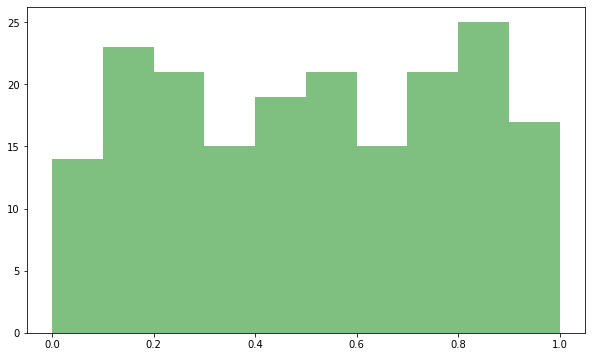

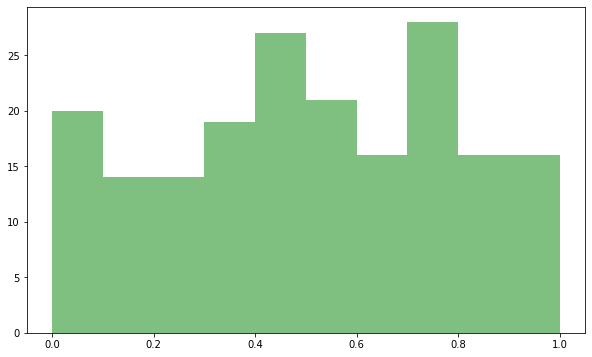

In [88]:
# Define selection based on initial runners
# Baserunners are a string, not list, because pandas doesn't like lists.
dfc = df[df['baserunners'] == "[1, 0]"]
# Define the final state runners as well
dfc = dfc[dfc['baserunners_next'] == "[2, 1]"]
print(len(dfc))

# Make thresholds
dfc["threshold_martyr"] = 0.05 + 0.25 * dfc["batter_martyrdom"]
dfc["threshold_dp"] = -0.05 + 0.40 * dfc["pitcher_shakespearianism_with_vibe"] - 0.18 * dfc["batter_inv_tragicness"] + 0.10 * dfc['fielder_tenaciousness_with_vibe'] - 0.16 * (dfc["ballpark_elongation"] - 0.5)
dfc["threshold_advance_first"] = 0.50 + 0.35 * dfc["runner_on_first_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_second"] = 0.50 + 0.35 * dfc["runner_on_second_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third"] = 0.50 + 0.35 * dfc["runner_on_third_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third_hh"] = 0.50 + 0.35 * dfc["runner_on_third_hh_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]] = dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]].clip(lower=0.001, axis="columns")

# Prove what we think is correct
dfc["guess"] = (dfc["roll1"] > dfc["threshold_dp"]) & (dfc["roll2"] < dfc["threshold_martyr"])
print(dfc["guess"].value_counts()) # If all True, we're right.

# Plot unused rolls
fig, ax = plt.subplots(1, figsize=(10, 6), facecolor='white')
ax.hist(
    dfc['roll3'],
    bins=10,
    range=[0.,1.],
    color="green",
    alpha = 0.5
)
fig, ax = plt.subplots(1, figsize=(10, 6), facecolor='white')
ax.hist(
    dfc['roll4'],
    bins=10,
    range=[0.,1.],
    color="green",
    alpha = 0.5
)

# Print Outliers
outliers = dfc[~dfc["guess"]]
n_outliers += len(outliers)
outliers[
    [
        "threshold_advance_second",
        "roll2",
        "event_type",
        "inning",
        "batter_name",
        "batter_mods",
        "batting_team_mods",
        "fielder_name",
        "fielder_mods",
        "pitcher_name",
        "pitcher_mods",
        "pitching_team_mods",
        "season",
        "day",
        "game_id",
        "play_count",
    ]
]

## Runners on First and Third

### [2, 0] -> []
DP (pass), DP Where (unused)

72
True    72
Name: guess, dtype: int64


,threshold_advance_second,roll2,event_type,inning,batter_name,batter_mods,batting_team_mods,fielder_name,fielder_mods,pitcher_name,pitcher_mods,pitching_team_mods,season,day,game_id,play_count


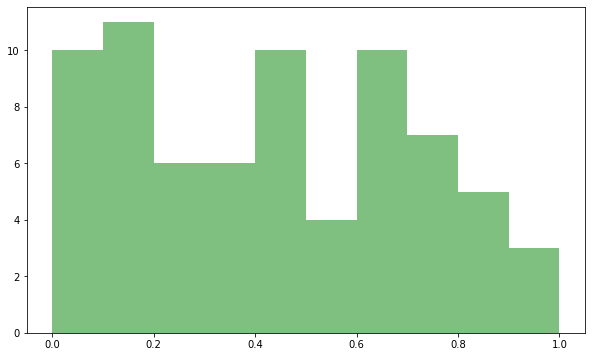

In [89]:
# Define selection based on initial runners
# Baserunners are a string, not list, because pandas doesn't like lists.
dfc = df[df['baserunners'] == "[2, 0]"]
# Define the final state runners as well
dfc = dfc[dfc['baserunners_next'] == "[]"]
print(len(dfc))

# Make thresholds
dfc["threshold_martyr"] = 0.05 + 0.25 * dfc["batter_martyrdom"]
dfc["threshold_dp"] = -0.05 + 0.40 * dfc["pitcher_shakespearianism_with_vibe"] - 0.18 * dfc["batter_inv_tragicness"] + 0.10 * dfc['fielder_tenaciousness_with_vibe'] - 0.16 * (dfc["ballpark_elongation"] - 0.5)
dfc["threshold_advance_first"] = 0.50 + 0.35 * dfc["runner_on_first_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_second"] = 0.50 + 0.35 * dfc["runner_on_second_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third"] = 0.50 + 0.35 * dfc["runner_on_third_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third_hh"] = 0.50 + 0.35 * dfc["runner_on_third_hh_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]] = dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]].clip(lower=0.001, axis="columns")

# Prove what we think is correct
dfc["guess"] = (dfc["roll1"] < dfc["threshold_dp"])
print(dfc["guess"].value_counts()) # If all True, we're right.

# Plot unused rolls
fig, ax = plt.subplots(1, figsize=(10, 6), facecolor='white')
ax.hist(
    dfc['roll2'],
    bins=10,
    range=[0.,1.],
    color="green",
    alpha = 0.5
)

# Print Outliers
outliers = dfc[~dfc["guess"]]
n_outliers += len(outliers)
outliers[
    [
        "threshold_advance_second",
        "roll2",
        "event_type",
        "inning",
        "batter_name",
        "batter_mods",
        "batting_team_mods",
        "fielder_name",
        "fielder_mods",
        "pitcher_name",
        "pitcher_mods",
        "pitching_team_mods",
        "season",
        "day",
        "game_id",
        "play_count",
    ]
]

### [2, 0] -> [0] (4 rolls)
DP (fail), Martyr (pass), 3rd Advance (pass), 1st Advance (fail)

In [90]:
# Define selection based on initial runners
# Baserunners are a string, not list, because pandas doesn't like lists.
dfc = df[(df['baserunners'] == "[2, 0]") & (~df['roll4'].isna())]
# Define the final state runners as well
dfc = dfc[dfc['baserunners_next'] == "[0]"]
print(len(dfc))

# Make thresholds
dfc["threshold_martyr"] = 0.05 + 0.25 * dfc["batter_martyrdom"]
dfc["threshold_dp"] = -0.05 + 0.40 * dfc["pitcher_shakespearianism_with_vibe"] - 0.18 * dfc["batter_inv_tragicness"] + 0.10 * dfc['fielder_tenaciousness_with_vibe'] - 0.16 * (dfc["ballpark_elongation"] - 0.5)
dfc["threshold_advance_first"] = 0.50 + 0.35 * dfc["runner_on_first_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_second"] = 0.50 + 0.35 * dfc["runner_on_second_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third"] = 0.50 + 0.35 * dfc["runner_on_third_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third_hh"] = 0.50 + 0.35 * dfc["runner_on_third_hh_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]] = dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]].clip(lower=0.001, axis="columns")

# Prove what we think is correct
dfc["guess"] = (dfc["roll1"] > dfc["threshold_dp"]) & (dfc["roll2"] < dfc["threshold_martyr"]) & (dfc["roll3"] < dfc["threshold_advance_third"]) & (dfc["roll4"] > dfc["threshold_advance_first"])
print(dfc["guess"].value_counts()) # If all True, we're right.

# Print Outliers
outliers = dfc[~dfc["guess"]]
n_outliers += len(outliers)
outliers[
    [
        "threshold_advance_second",
        "roll2",
        "event_type",
        "inning",
        "batter_name",
        "batter_mods",
        "batting_team_mods",
        "fielder_name",
        "fielder_mods",
        "pitcher_name",
        "pitcher_mods",
        "pitching_team_mods",
        "season",
        "day",
        "game_id",
        "play_count",
    ]
]

28
True    28
Name: guess, dtype: int64


,threshold_advance_second,roll2,event_type,inning,batter_name,batter_mods,batting_team_mods,fielder_name,fielder_mods,pitcher_name,pitcher_mods,pitching_team_mods,season,day,game_id,play_count


### [2, 0] -> [0] (2 rolls)
DP (fail), Martyr (fail)

In [91]:
# Define selection based on initial runners
# Baserunners are a string, not list, because pandas doesn't like lists.
dfc = df[(df['baserunners'] == "[2, 0]") & (df['roll3'].isna())]
# Define the final state runners as well
dfc = dfc[dfc['baserunners_next'] == "[0]"]
print(len(dfc))

# Make thresholds
dfc["threshold_martyr"] = 0.05 + 0.25 * dfc["batter_martyrdom"]
dfc["threshold_dp"] = -0.05 + 0.40 * dfc["pitcher_shakespearianism_with_vibe"] - 0.18 * dfc["batter_inv_tragicness"] + 0.10 * dfc['fielder_tenaciousness_with_vibe'] - 0.16 * (dfc["ballpark_elongation"] - 0.5)
dfc["threshold_advance_first"] = 0.50 + 0.35 * dfc["runner_on_first_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_second"] = 0.50 + 0.35 * dfc["runner_on_second_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third"] = 0.50 + 0.35 * dfc["runner_on_third_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third_hh"] = 0.50 + 0.35 * dfc["runner_on_third_hh_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]] = dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]].clip(lower=0.001, axis="columns")

# Prove what we think is correct
dfc["guess"] = (dfc["roll1"] > dfc["threshold_dp"]) & (dfc["roll2"] > dfc["threshold_martyr"])
print(dfc["guess"].value_counts()) # If all True, we're right.

# Print Outliers
outliers = dfc[~dfc["guess"]]
n_outliers += len(outliers)
outliers[
    [
        "threshold_advance_second",
        "roll2",
        "event_type",
        "inning",
        "batter_name",
        "batter_mods",
        "batting_team_mods",
        "fielder_name",
        "fielder_mods",
        "pitcher_name",
        "pitcher_mods",
        "pitching_team_mods",
        "season",
        "day",
        "game_id",
        "play_count",
    ]
]

497
True    497
Name: guess, dtype: int64


,threshold_advance_second,roll2,event_type,inning,batter_name,batter_mods,batting_team_mods,fielder_name,fielder_mods,pitcher_name,pitcher_mods,pitching_team_mods,season,day,game_id,play_count


### [2, 0] -> [1]
DP (fail), Martyr (pass), 3rd Advance (pass), 1st Advance (pass)

In [92]:
# Define selection based on initial runners
# Baserunners are a string, not list, because pandas doesn't like lists.
dfc = df[df['baserunners'] == "[2, 0]"]
# Define the final state runners as well
dfc = dfc[dfc['baserunners_next'] == "[1]"]
print(len(dfc))

# Make thresholds
dfc["threshold_martyr"] = 0.05 + 0.25 * dfc["batter_martyrdom"]
dfc["threshold_dp"] = -0.05 + 0.40 * dfc["pitcher_shakespearianism_with_vibe"] - 0.18 * dfc["batter_inv_tragicness"] + 0.10 * dfc['fielder_tenaciousness_with_vibe'] - 0.16 * (dfc["ballpark_elongation"] - 0.5)
dfc["threshold_advance_first"] = 0.50 + 0.35 * dfc["runner_on_first_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_second"] = 0.50 + 0.35 * dfc["runner_on_second_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third"] = 0.50 + 0.35 * dfc["runner_on_third_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third_hh"] = 0.50 + 0.35 * dfc["runner_on_third_hh_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]] = dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]].clip(lower=0.001, axis="columns")

# Prove what we think is correct
dfc["guess"] = (dfc["roll1"] > dfc["threshold_dp"]) & (dfc["roll2"] < dfc["threshold_martyr"]) & (dfc["roll3"] < dfc["threshold_advance_third"]) & (dfc["roll4"] < dfc["threshold_advance_first"])
print(dfc["guess"].value_counts()) # If all True, we're right.

# Print Outliers
outliers = dfc[~dfc["guess"]]
n_outliers += len(outliers)
outliers[
    [
        "threshold_advance_second",
        "roll2",
        "event_type",
        "inning",
        "batter_name",
        "batter_mods",
        "batting_team_mods",
        "fielder_name",
        "fielder_mods",
        "pitcher_name",
        "pitcher_mods",
        "pitching_team_mods",
        "season",
        "day",
        "game_id",
        "play_count",
    ]
]

57
True    57
Name: guess, dtype: int64


,threshold_advance_second,roll2,event_type,inning,batter_name,batter_mods,batting_team_mods,fielder_name,fielder_mods,pitcher_name,pitcher_mods,pitching_team_mods,season,day,game_id,play_count


### [2, 0] -> [2, 1]
DP (fail), Martyr (pass), 3rd Advance (fail), ??? (unused). Last one is maybe fake advancement roll

59
True     58
False     1
Name: guess, dtype: int64


,threshold_dp,roll1,threshold_martyr,roll2,threshold_advance_third,roll3,event_type,inning,runner_on_third_name,runner_on_third_mods,batting_team_mods,fielder_name,fielder_mods,pitching_team_mods,season,day,game_id,play_count
58093,0.001,0.746893,0.198216,0.028145,0.561354,0.310588,groundout,6,Carmelo Plums,NaN,NaN,Kichiro Guerra,ALTERNATE;MAXIMALIST,LOVE,14,36,cac35c5e-0464-4962-9930-2a7c25b79bf4,235


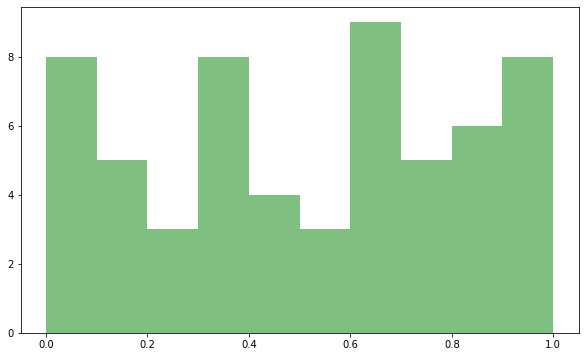

In [93]:
# Define selection based on initial runners
# Baserunners are a string, not list, because pandas doesn't like lists.
dfc = df[df['baserunners'] == "[2, 0]"]
# Define the final state runners as well
dfc = dfc[dfc['baserunners_next'] == "[2, 1]"]
print(len(dfc))

# Make thresholds
dfc["threshold_martyr"] = 0.05 + 0.25 * dfc["batter_martyrdom"]
dfc["threshold_dp"] = -0.05 + 0.40 * dfc["pitcher_shakespearianism_with_vibe"] - 0.18 * dfc["batter_inv_tragicness"] + 0.10 * dfc['fielder_tenaciousness_with_vibe'] - 0.16 * (dfc["ballpark_elongation"] - 0.5)
dfc["threshold_advance_first"] = 0.50 + 0.35 * dfc["runner_on_first_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_second"] = 0.50 + 0.35 * dfc["runner_on_second_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third"] = 0.50 + 0.35 * dfc["runner_on_third_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third_hh"] = 0.50 + 0.35 * dfc["runner_on_third_hh_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]] = dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]].clip(lower=0.001, axis="columns")

# Prove what we think is correct
dfc["guess"] = (dfc["roll1"] > dfc["threshold_dp"]) & (dfc["roll2"] < dfc["threshold_martyr"]) & (dfc["roll3"] > dfc["threshold_advance_third"])
print(dfc["guess"].value_counts()) # If all True, we're right.

# Plot unused rolls
fig, ax = plt.subplots(1, figsize=(10, 6), facecolor='white')
ax.hist(
    dfc['roll4'],
    bins=10,
    range=[0.,1.],
    color="green",
    alpha = 0.5
)

# Print Outliers
outliers = dfc[~dfc["guess"]]
n_outliers += len(outliers)
outliers[
    [
        "threshold_dp",
        "roll1",
        "threshold_martyr",
        "roll2",
        "threshold_advance_third",
        "roll3",
        "event_type",
        "inning",
        # "batter_name",
        # "batter_mods",
        "runner_on_third_name",
        "runner_on_third_mods",
        "batting_team_mods",
        "fielder_name",
        "fielder_mods",
        # "pitcher_name",
        # "pitcher_mods",
        "pitching_team_mods",
        "season",
        "day",
        "game_id",
        "play_count",
    ]
]

## Runners on Second and Third

### [2, 1] -> [1]
DP (unused), 3rd Advance (pass), 2nd Advance (fail)

48
True    48
Name: guess, dtype: int64


,threshold_advance_second,roll2,event_type,inning,batter_name,batter_mods,batting_team_mods,fielder_name,fielder_mods,pitcher_name,pitcher_mods,pitching_team_mods,season,day,game_id,play_count


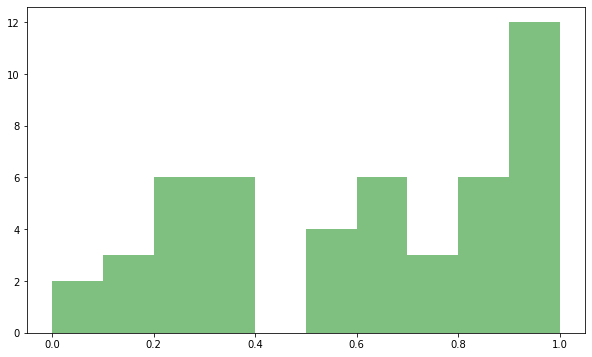

In [94]:
# Define selection based on initial runners
# Baserunners are a string, not list, because pandas doesn't like lists.
dfc = df[df['baserunners'] == "[2, 1]"]
# Define the final state runners as well
dfc = dfc[dfc['baserunners_next'] == "[1]"]
print(len(dfc))

# Make thresholds
dfc["threshold_martyr"] = 0.05 + 0.25 * dfc["batter_martyrdom"]
dfc["threshold_dp"] = -0.05 + 0.40 * dfc["pitcher_shakespearianism_with_vibe"] - 0.18 * dfc["batter_inv_tragicness"] + 0.10 * dfc['fielder_tenaciousness_with_vibe'] - 0.16 * (dfc["ballpark_elongation"] - 0.5)
dfc["threshold_advance_first"] = 0.50 + 0.35 * dfc["runner_on_first_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_second"] = 0.50 + 0.35 * dfc["runner_on_second_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third"] = 0.50 + 0.35 * dfc["runner_on_third_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third_hh"] = 0.50 + 0.35 * dfc["runner_on_third_hh_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]] = dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]].clip(lower=0.001, axis="columns")

# Prove what we think is correct
dfc["guess"] = (dfc["roll2"] < dfc["threshold_advance_third"]) & (dfc["roll3"] > dfc["threshold_advance_second"])
print(dfc["guess"].value_counts()) # If all True, we're right.

# Plot unused rolls
fig, ax = plt.subplots(1, figsize=(10, 6), facecolor='white')
ax.hist(
    dfc['roll1'],
    bins=10,
    range=[0.,1.],
    color="green",
    alpha = 0.5
)

# Print Outliers
outliers = dfc[~dfc["guess"]]
n_outliers += len(outliers)
outliers[
    [
        "threshold_advance_second",
        "roll2",
        "event_type",
        "inning",
        "batter_name",
        "batter_mods",
        "batting_team_mods",
        "fielder_name",
        "fielder_mods",
        "pitcher_name",
        "pitcher_mods",
        "pitching_team_mods",
        "season",
        "day",
        "game_id",
        "play_count",
    ]
]

### [2, 1] -> [2]
DP (unused), 3rd Advance (pass), 2nd Advance (pass)

139
True    139
Name: guess, dtype: int64


,threshold_advance_second,roll2,event_type,inning,batter_name,batter_mods,batting_team_mods,fielder_name,fielder_mods,pitcher_name,pitcher_mods,pitching_team_mods,season,day,game_id,play_count


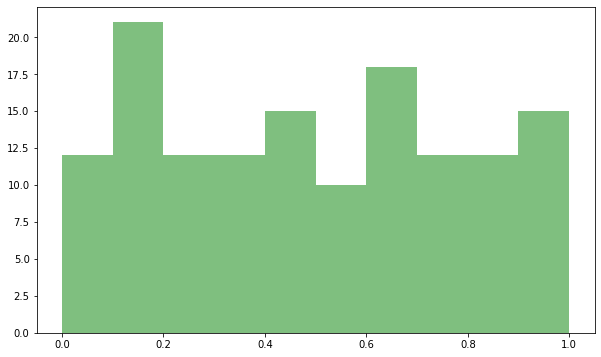

In [95]:
# Define selection based on initial runners
# Baserunners are a string, not list, because pandas doesn't like lists.
dfc = df[df['baserunners'] == "[2, 1]"]
# Define the final state runners as well
dfc = dfc[dfc['baserunners_next'] == "[2]"]
print(len(dfc))

# Make thresholds
dfc["threshold_martyr"] = 0.05 + 0.25 * dfc["batter_martyrdom"]
dfc["threshold_dp"] = -0.05 + 0.40 * dfc["pitcher_shakespearianism_with_vibe"] - 0.18 * dfc["batter_inv_tragicness"] + 0.10 * dfc['fielder_tenaciousness_with_vibe'] - 0.16 * (dfc["ballpark_elongation"] - 0.5)
dfc["threshold_advance_first"] = 0.50 + 0.35 * dfc["runner_on_first_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_second"] = 0.50 + 0.35 * dfc["runner_on_second_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third"] = 0.50 + 0.35 * dfc["runner_on_third_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third_hh"] = 0.50 + 0.35 * dfc["runner_on_third_hh_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]] = dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]].clip(lower=0.001, axis="columns")

# Prove what we think is correct
dfc["guess"] = (dfc["roll2"] < dfc["threshold_advance_third"]) & (dfc["roll3"] < dfc["threshold_advance_second"])
print(dfc["guess"].value_counts()) # If all True, we're right.

# Plot unused rolls
fig, ax = plt.subplots(1, figsize=(10, 6), facecolor='white')
ax.hist(
    dfc['roll1'],
    bins=10,
    range=[0.,1.],
    color="green",
    alpha = 0.5
)

# Print Outliers
outliers = dfc[~dfc["guess"]]
n_outliers += len(outliers)
outliers[
    [
        "threshold_advance_second",
        "roll2",
        "event_type",
        "inning",
        "batter_name",
        "batter_mods",
        "batting_team_mods",
        "fielder_name",
        "fielder_mods",
        "pitcher_name",
        "pitcher_mods",
        "pitching_team_mods",
        "season",
        "day",
        "game_id",
        "play_count",
    ]
]

### [2, 1] -> [2, 1]
DP (unused), 3rd Advance (fail), 2nd Advance (fail)

28
True    28
Name: guess, dtype: int64


,threshold_advance_second,roll2,event_type,inning,batter_name,batter_mods,batting_team_mods,fielder_name,fielder_mods,pitcher_name,pitcher_mods,pitching_team_mods,season,day,game_id,play_count


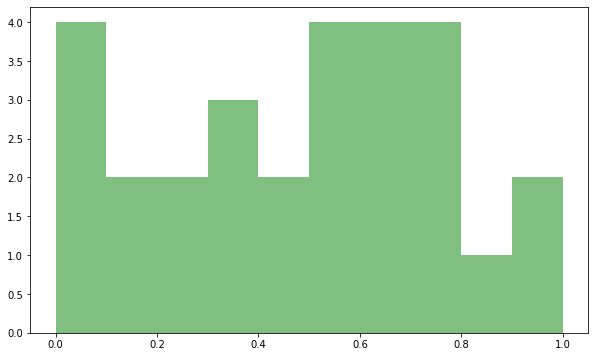

In [96]:
# Define selection based on initial runners
# Baserunners are a string, not list, because pandas doesn't like lists.
dfc = df[df['baserunners'] == "[2, 1]"]
# Define the final state runners as well
dfc = dfc[dfc['baserunners_next'] == "[2, 1]"]
print(len(dfc))

# Make thresholds
dfc["threshold_martyr"] = 0.05 + 0.25 * dfc["batter_martyrdom"]
dfc["threshold_dp"] = -0.05 + 0.40 * dfc["pitcher_shakespearianism_with_vibe"] - 0.18 * dfc["batter_inv_tragicness"] + 0.10 * dfc['fielder_tenaciousness_with_vibe'] - 0.16 * (dfc["ballpark_elongation"] - 0.5)
dfc["threshold_advance_first"] = 0.50 + 0.35 * dfc["runner_on_first_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_second"] = 0.50 + 0.35 * dfc["runner_on_second_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third"] = 0.50 + 0.35 * dfc["runner_on_third_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third_hh"] = 0.50 + 0.35 * dfc["runner_on_third_hh_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]] = dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]].clip(lower=0.001, axis="columns")

# Prove what we think is correct
dfc["guess"] = (dfc["roll2"] > dfc["threshold_advance_third"]) & (dfc["roll3"] > dfc["threshold_advance_second"])
print(dfc["guess"].value_counts()) # If all True, we're right.

# Plot unused rolls
fig, ax = plt.subplots(1, figsize=(10, 6), facecolor='white')
ax.hist(
    dfc['roll1'],
    bins=10,
    range=[0.,1.],
    color="green",
    alpha = 0.5
)

# Print Outliers
outliers = dfc[~dfc["guess"]]
n_outliers += len(outliers)
outliers[
    [
        "threshold_advance_second",
        "roll2",
        "event_type",
        "inning",
        "batter_name",
        "batter_mods",
        "batting_team_mods",
        "fielder_name",
        "fielder_mods",
        "pitcher_name",
        "pitcher_mods",
        "pitching_team_mods",
        "season",
        "day",
        "game_id",
        "play_count",
    ]
]

### [2, 1] -> [2, 2]
DP (unused), 3rd Advance (fail), 2nd Advance (pass)

52
True    52
Name: guess, dtype: int64


,threshold_advance_second,roll2,event_type,inning,batter_name,batter_mods,batting_team_mods,fielder_name,fielder_mods,pitcher_name,pitcher_mods,pitching_team_mods,season,day,game_id,play_count


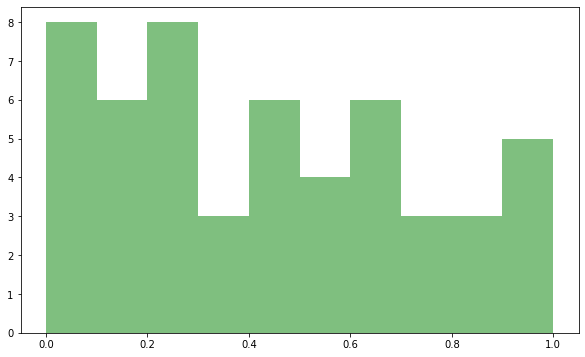

In [97]:
# Define selection based on initial runners
# Baserunners are a string, not list, because pandas doesn't like lists.
dfc = df[df['baserunners'] == "[2, 1]"]
# Define the final state runners as well
dfc = dfc[dfc['baserunners_next'] == "[2, 2]"]
print(len(dfc))

# Make thresholds
dfc["threshold_martyr"] = 0.05 + 0.25 * dfc["batter_martyrdom"]
dfc["threshold_dp"] = -0.05 + 0.40 * dfc["pitcher_shakespearianism_with_vibe"] - 0.18 * dfc["batter_inv_tragicness"] + 0.10 * dfc['fielder_tenaciousness_with_vibe'] - 0.16 * (dfc["ballpark_elongation"] - 0.5)
dfc["threshold_advance_first"] = 0.50 + 0.35 * dfc["runner_on_first_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_second"] = 0.50 + 0.35 * dfc["runner_on_second_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third"] = 0.50 + 0.35 * dfc["runner_on_third_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third_hh"] = 0.50 + 0.35 * dfc["runner_on_third_hh_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]] = dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]].clip(lower=0.001, axis="columns")

# Prove what we think is correct
dfc["guess"] = (dfc["roll2"] > dfc["threshold_advance_third"]) & (dfc["roll3"] < dfc["threshold_advance_second"])
print(dfc["guess"].value_counts()) # If all True, we're right.

# Plot unused rolls
fig, ax = plt.subplots(1, figsize=(10, 6), facecolor='white')
ax.hist(
    dfc['roll1'],
    bins=10,
    range=[0.,1.],
    color="green",
    alpha = 0.5
)

# Print Outliers
outliers = dfc[~dfc["guess"]]
n_outliers += len(outliers)
outliers[
    [
        "threshold_advance_second",
        "roll2",
        "event_type",
        "inning",
        "batter_name",
        "batter_mods",
        "batting_team_mods",
        "fielder_name",
        "fielder_mods",
        "pitcher_name",
        "pitcher_mods",
        "pitching_team_mods",
        "season",
        "day",
        "game_id",
        "play_count",
    ]
]

## Runners Holding Hands on Third

### [2, 2] -> []
DP (unused), 3rd Advance (pass), 3rd hh Advance (pass)

5
True    5
Name: guess, dtype: int64


,threshold_advance_second,roll2,event_type,inning,batter_name,batter_mods,batting_team_mods,fielder_name,fielder_mods,pitcher_name,pitcher_mods,pitching_team_mods,season,day,game_id,play_count


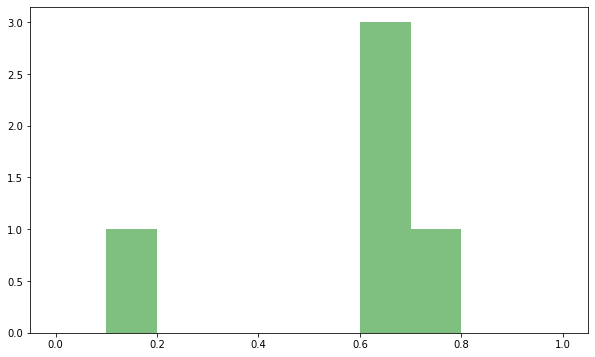

In [98]:
# Define selection based on initial runners
# Baserunners are a string, not list, because pandas doesn't like lists.
dfc = df[df['baserunners'] == "[2, 2]"]
# Define the final state runners as well
dfc = dfc[dfc['baserunners_next'] == "[]"]
print(len(dfc))

# Make thresholds
dfc["threshold_martyr"] = 0.05 + 0.25 * dfc["batter_martyrdom"]
dfc["threshold_dp"] = -0.05 + 0.40 * dfc["pitcher_shakespearianism_with_vibe"] - 0.18 * dfc["batter_inv_tragicness"] + 0.10 * dfc['fielder_tenaciousness_with_vibe'] - 0.16 * (dfc["ballpark_elongation"] - 0.5)
dfc["threshold_advance_first"] = 0.50 + 0.35 * dfc["runner_on_first_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_second"] = 0.50 + 0.35 * dfc["runner_on_second_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third"] = 0.50 + 0.35 * dfc["runner_on_third_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third_hh"] = 0.50 + 0.35 * dfc["runner_on_third_hh_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]] = dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]].clip(lower=0.001, axis="columns")

# Prove what we think is correct
dfc["guess"] = (dfc["roll2"] < dfc["threshold_advance_third"]) & (dfc["roll3"] < dfc["threshold_advance_third_hh"])
print(dfc["guess"].value_counts()) # If all True, we're right.

# Plot unused rolls
fig, ax = plt.subplots(1, figsize=(10, 6), facecolor='white')
ax.hist(
    dfc['roll1'],
    bins=10,
    range=[0.,1.],
    color="green",
    alpha = 0.5
)

# Print Outliers
outliers = dfc[~dfc["guess"]]
n_outliers += len(outliers)
outliers[
    [
        "threshold_advance_second",
        "roll2",
        "event_type",
        "inning",
        "batter_name",
        "batter_mods",
        "batting_team_mods",
        "fielder_name",
        "fielder_mods",
        "pitcher_name",
        "pitcher_mods",
        "pitching_team_mods",
        "season",
        "day",
        "game_id",
        "play_count",
    ]
]

### [2, 2] -> [2]
DP (unused), 3rd Advance (fail), 3rd Advance hh (pass)
OR
DP (unused), 3rd Advance (pass), 3rd Advance hh (fail)
- We only have 3 examples of the former and none of the latter!

3
True    3
Name: guess, dtype: int64


,threshold_advance_second,roll2,event_type,inning,batter_name,batter_mods,batting_team_mods,fielder_name,fielder_mods,pitcher_name,pitcher_mods,pitching_team_mods,season,day,game_id,play_count


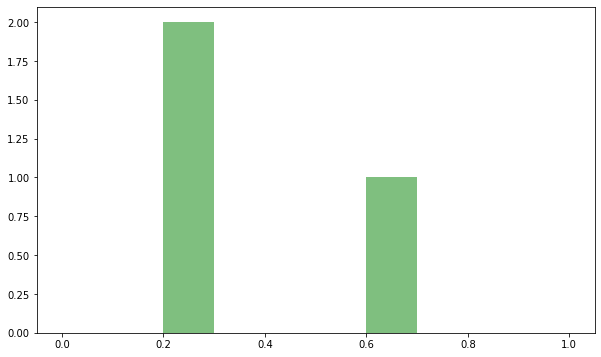

In [99]:
# Define selection based on initial runners
# Baserunners are a string, not list, because pandas doesn't like lists.
dfc = df[df['baserunners'] == "[2, 2]"]
# Define the final state runners as well
dfc = dfc[dfc['baserunners_next'] == "[2]"]
print(len(dfc))

# Make thresholds
dfc["threshold_martyr"] = 0.05 + 0.25 * dfc["batter_martyrdom"]
dfc["threshold_dp"] = -0.05 + 0.40 * dfc["pitcher_shakespearianism_with_vibe"] - 0.18 * dfc["batter_inv_tragicness"] + 0.10 * dfc['fielder_tenaciousness_with_vibe'] - 0.16 * (dfc["ballpark_elongation"] - 0.5)
dfc["threshold_advance_first"] = 0.50 + 0.35 * dfc["runner_on_first_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_second"] = 0.50 + 0.35 * dfc["runner_on_second_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third"] = 0.50 + 0.35 * dfc["runner_on_third_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third_hh"] = 0.50 + 0.35 * dfc["runner_on_third_hh_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]] = dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]].clip(lower=0.001, axis="columns")

# Prove what we think is correct
dfc["guess"] = (dfc["roll2"] < dfc["threshold_advance_third"]) | (dfc["roll3"] < dfc["threshold_advance_third_hh"])
print(dfc["guess"].value_counts()) # If all True, we're right.

# Plot unused rolls
fig, ax = plt.subplots(1, figsize=(10, 6), facecolor='white')
ax.hist(
    dfc['roll1'],
    bins=10,
    range=[0.,1.],
    color="green",
    alpha = 0.5
)

# Print Outliers
outliers = dfc[~dfc["guess"]]
n_outliers += len(outliers)
outliers[
    [
        "threshold_advance_second",
        "roll2",
        "event_type",
        "inning",
        "batter_name",
        "batter_mods",
        "batting_team_mods",
        "fielder_name",
        "fielder_mods",
        "pitcher_name",
        "pitcher_mods",
        "pitching_team_mods",
        "season",
        "day",
        "game_id",
        "play_count",
    ]
]

### [2, 2] -> [2, 2]
DP (unused), 3rd Advance (fail), 3rd Advance (fail)

2
True    2
Name: guess, dtype: int64


,threshold_advance_second,roll2,event_type,inning,batter_name,batter_mods,batting_team_mods,fielder_name,fielder_mods,pitcher_name,pitcher_mods,pitching_team_mods,season,day,game_id,play_count


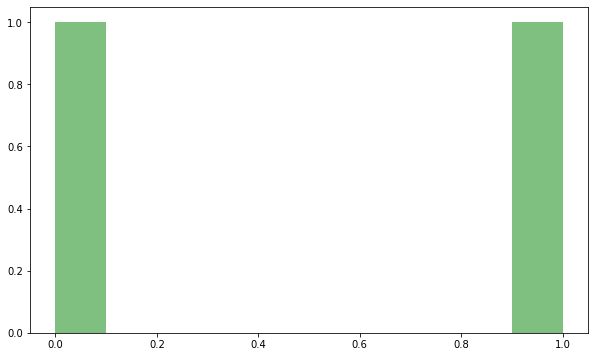

In [100]:
# Define selection based on initial runners
# Baserunners are a string, not list, because pandas doesn't like lists.
dfc = df[df['baserunners'] == "[2, 2]"]
# Define the final state runners as well
dfc = dfc[dfc['baserunners_next'] == "[2, 2]"]
print(len(dfc))

# Make thresholds
dfc["threshold_martyr"] = 0.05 + 0.25 * dfc["batter_martyrdom"]
dfc["threshold_dp"] = -0.05 + 0.40 * dfc["pitcher_shakespearianism_with_vibe"] - 0.18 * dfc["batter_inv_tragicness"] + 0.10 * dfc['fielder_tenaciousness_with_vibe'] - 0.16 * (dfc["ballpark_elongation"] - 0.5)
dfc["threshold_advance_first"] = 0.50 + 0.35 * dfc["runner_on_first_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_second"] = 0.50 + 0.35 * dfc["runner_on_second_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third"] = 0.50 + 0.35 * dfc["runner_on_third_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third_hh"] = 0.50 + 0.35 * dfc["runner_on_third_hh_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]] = dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]].clip(lower=0.001, axis="columns")

# Prove what we think is correct
dfc["guess"] = (dfc["roll2"] > dfc["threshold_advance_third"]) & (dfc["roll3"] > dfc["threshold_advance_third_hh"])
print(dfc["guess"].value_counts()) # If all True, we're right.

# Plot unused rolls
fig, ax = plt.subplots(1, figsize=(10, 6), facecolor='white')
ax.hist(
    dfc['roll1'],
    bins=10,
    range=[0.,1.],
    color="green",
    alpha = 0.5
)

# Print Outliers
outliers = dfc[~dfc["guess"]]
n_outliers += len(outliers)
outliers[
    [
        "threshold_advance_second",
        "roll2",
        "event_type",
        "inning",
        "batter_name",
        "batter_mods",
        "batting_team_mods",
        "fielder_name",
        "fielder_mods",
        "pitcher_name",
        "pitcher_mods",
        "pitching_team_mods",
        "season",
        "day",
        "game_id",
        "play_count",
    ]
]

## Bases Loaded

### [2, 1, 0] -> []
DP (pass), DP Where (unused?)

22
True    22
Name: guess, dtype: int64


,threshold_advance_second,roll2,event_type,inning,batter_name,batter_mods,batting_team_mods,fielder_name,fielder_mods,pitcher_name,pitcher_mods,pitching_team_mods,season,day,game_id,play_count


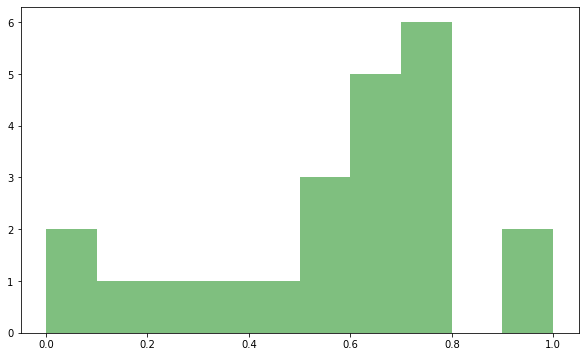

In [101]:
# Define selection based on initial runners
# Baserunners are a string, not list, because pandas doesn't like lists.
dfc = df[df['baserunners'] == "[2, 1, 0]"]
# Define the final state runners as well
dfc = dfc[dfc['baserunners_next'] == "[]"]
print(len(dfc))

# Make thresholds
dfc["threshold_martyr"] = 0.05 + 0.25 * dfc["batter_martyrdom"]
dfc["threshold_dp"] = -0.05 + 0.40 * dfc["pitcher_shakespearianism_with_vibe"] - 0.18 * dfc["batter_inv_tragicness"] + 0.10 * dfc['fielder_tenaciousness_with_vibe'] - 0.16 * (dfc["ballpark_elongation"] - 0.5)
dfc["threshold_advance_first"] = 0.50 + 0.35 * dfc["runner_on_first_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_second"] = 0.50 + 0.35 * dfc["runner_on_second_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third"] = 0.50 + 0.35 * dfc["runner_on_third_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third_hh"] = 0.50 + 0.35 * dfc["runner_on_third_hh_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]] = dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]].clip(lower=0.001, axis="columns")

# Prove what we think is correct
dfc["guess"] = (dfc["roll1"] < dfc["threshold_dp"])
print(dfc["guess"].value_counts()) # If all True, we're right.

# Plot unused rolls
fig, ax = plt.subplots(1, figsize=(10, 6), facecolor='white')
ax.hist(
    dfc['roll2'],
    bins=10,
    range=[0.,1.],
    color="green",
    alpha = 0.5
)

# Print Outliers
outliers = dfc[~dfc["guess"]]
n_outliers += len(outliers)
outliers[
    [
        "threshold_advance_second",
        "roll2",
        "event_type",
        "inning",
        "batter_name",
        "batter_mods",
        "batting_team_mods",
        "fielder_name",
        "fielder_mods",
        "pitcher_name",
        "pitcher_mods",
        "pitching_team_mods",
        "season",
        "day",
        "game_id",
        "play_count",
    ]
]

### [2, 1, 0] -> [1]
DP (pass), DP Where between 1/3 - 2/3

In [102]:
# Define selection based on initial runners
# Baserunners are a string, not list, because pandas doesn't like lists.
dfc = df[df['baserunners'] == "[2, 1, 0]"]
# Define the final state runners as well
dfc = dfc[dfc['baserunners_next'] == "[1]"]
print(len(dfc))

# Make thresholds
dfc["threshold_martyr"] = 0.05 + 0.25 * dfc["batter_martyrdom"]
dfc["threshold_dp"] = -0.05 + 0.40 * dfc["pitcher_shakespearianism_with_vibe"] - 0.18 * dfc["batter_inv_tragicness"] + 0.10 * dfc['fielder_tenaciousness_with_vibe'] - 0.16 * (dfc["ballpark_elongation"] - 0.5)
dfc["threshold_advance_first"] = 0.50 + 0.35 * dfc["runner_on_first_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_second"] = 0.50 + 0.35 * dfc["runner_on_second_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third"] = 0.50 + 0.35 * dfc["runner_on_third_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third_hh"] = 0.50 + 0.35 * dfc["runner_on_third_hh_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]] = dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]].clip(lower=0.001, axis="columns")

# Prove what we think is correct
dfc["guess"] = (dfc["roll1"] < dfc["threshold_dp"]) & (dfc["roll2"] > 1/3) & (dfc["roll2"] < 2/3)
print(dfc["guess"].value_counts()) # If all True, we're right.

# Print Outliers
outliers = dfc[~dfc["guess"]]
n_outliers += len(outliers)
outliers[
    [
        "threshold_advance_second",
        "roll2",
        "event_type",
        "inning",
        "batter_name",
        "batter_mods",
        "batting_team_mods",
        "fielder_name",
        "fielder_mods",
        "pitcher_name",
        "pitcher_mods",
        "pitching_team_mods",
        "season",
        "day",
        "game_id",
        "play_count",
    ]
]

4
True    4
Name: guess, dtype: int64


,threshold_advance_second,roll2,event_type,inning,batter_name,batter_mods,batting_team_mods,fielder_name,fielder_mods,pitcher_name,pitcher_mods,pitching_team_mods,season,day,game_id,play_count


### [2, 1, 0] -> [2]
DP (pass), DP Where > 2/3

In [103]:
# Define selection based on initial runners
# Baserunners are a string, not list, because pandas doesn't like lists.
dfc = df[df['baserunners'] == "[2, 1, 0]"]
# Define the final state runners as well
dfc = dfc[dfc['baserunners_next'] == "[2]"]
print(len(dfc))

# Make thresholds
dfc["threshold_martyr"] = 0.05 + 0.25 * dfc["batter_martyrdom"]
dfc["threshold_dp"] = -0.05 + 0.40 * dfc["pitcher_shakespearianism_with_vibe"] - 0.18 * dfc["batter_inv_tragicness"] + 0.10 * dfc['fielder_tenaciousness_with_vibe'] - 0.16 * (dfc["ballpark_elongation"] - 0.5)
dfc["threshold_advance_first"] = 0.50 + 0.35 * dfc["runner_on_first_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_second"] = 0.50 + 0.35 * dfc["runner_on_second_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third"] = 0.50 + 0.35 * dfc["runner_on_third_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third_hh"] = 0.50 + 0.35 * dfc["runner_on_third_hh_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]] = dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]].clip(lower=0.001, axis="columns")

# Prove what we think is correct
dfc["guess"] = (dfc["roll1"] < dfc["threshold_dp"]) & (dfc["roll2"] > 2/3)
print(dfc["guess"].value_counts()) # If all True, we're right.

# Print Outliers
outliers = dfc[~dfc["guess"]]
n_outliers += len(outliers)
outliers[
    [
        "threshold_advance_second",
        "roll2",
        "event_type",
        "inning",
        "batter_name",
        "batter_mods",
        "batting_team_mods",
        "fielder_name",
        "fielder_mods",
        "pitcher_name",
        "pitcher_mods",
        "pitching_team_mods",
        "season",
        "day",
        "game_id",
        "play_count",
    ]
]

3
True    3
Name: guess, dtype: int64


,threshold_advance_second,roll2,event_type,inning,batter_name,batter_mods,batting_team_mods,fielder_name,fielder_mods,pitcher_name,pitcher_mods,pitching_team_mods,season,day,game_id,play_count


### [2, 1, 0] -> [2, 1] (two rolls)
DP (pass), DP Where < 1/3

In [104]:
# Define selection based on initial runners
# Baserunners are a string, not list, because pandas doesn't like lists.
dfc = df[(df['baserunners'] == "[2, 1, 0]") & (df['roll3'].isna())]
# Define the final state runners as well
dfc = dfc[dfc['baserunners_next'] == "[2, 1]"]
print(len(dfc))

# Make thresholds
dfc["threshold_martyr"] = 0.05 + 0.25 * dfc["batter_martyrdom"]
dfc["threshold_dp"] = -0.05 + 0.40 * dfc["pitcher_shakespearianism_with_vibe"] - 0.18 * dfc["batter_inv_tragicness"] + 0.10 * dfc['fielder_tenaciousness_with_vibe'] - 0.16 * (dfc["ballpark_elongation"] - 0.5)
dfc["threshold_advance_first"] = 0.50 + 0.35 * dfc["runner_on_first_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_second"] = 0.50 + 0.35 * dfc["runner_on_second_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third"] = 0.50 + 0.35 * dfc["runner_on_third_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third_hh"] = 0.50 + 0.35 * dfc["runner_on_third_hh_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]] = dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]].clip(lower=0.001, axis="columns")

# Prove what we think is correct
dfc["guess"] = (dfc["roll1"] < dfc["threshold_dp"]) & (dfc["roll2"] < 1/3)
print(dfc["guess"].value_counts()) # If all True, we're right.

# Print Outliers
outliers = dfc[~dfc["guess"]]
n_outliers += len(outliers)
outliers[
    [
        "threshold_advance_second",
        "roll2",
        "event_type",
        "inning",
        "batter_name",
        "batter_mods",
        "batting_team_mods",
        "fielder_name",
        "fielder_mods",
        "pitcher_name",
        "pitcher_mods",
        "pitching_team_mods",
        "season",
        "day",
        "game_id",
        "play_count",
    ]
]

4
True    4
Name: guess, dtype: int64


,threshold_advance_second,roll2,event_type,inning,batter_name,batter_mods,batting_team_mods,fielder_name,fielder_mods,pitcher_name,pitcher_mods,pitching_team_mods,season,day,game_id,play_count


### [2, 1, 0] -> [2, 1] (five rolls)
DP (fail), Martyr (pass), ???, ???, ???. Last three are maybe fake advancment rolls

63
True    63
Name: guess, dtype: int64


,threshold_advance_second,roll2,event_type,inning,batter_name,batter_mods,batting_team_mods,fielder_name,fielder_mods,pitcher_name,pitcher_mods,pitching_team_mods,season,day,game_id,play_count


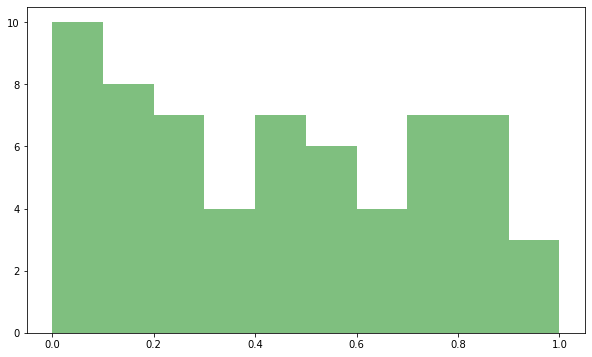

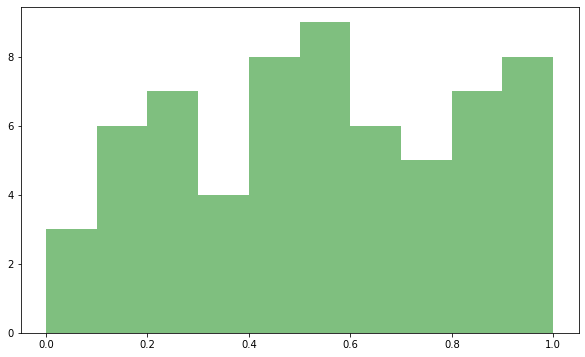

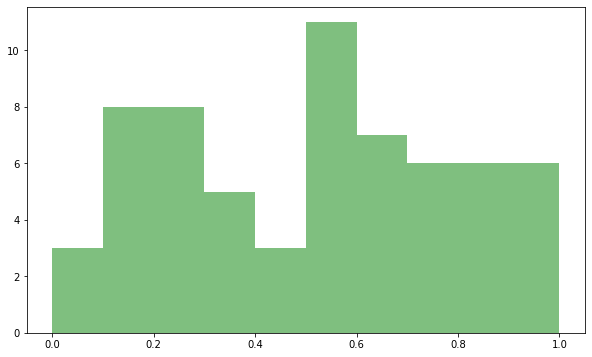

In [105]:
# Define selection based on initial runners
# Baserunners are a string, not list, because pandas doesn't like lists.
dfc = df[(df['baserunners'] == "[2, 1, 0]") & (~df['roll5'].isna())]
# Define the final state runners as well
dfc = dfc[dfc['baserunners_next'] == "[2, 1]"]
print(len(dfc))

# Make thresholds
dfc["threshold_martyr"] = 0.05 + 0.25 * dfc["batter_martyrdom"]
dfc["threshold_dp"] = -0.05 + 0.40 * dfc["pitcher_shakespearianism_with_vibe"] - 0.18 * dfc["batter_inv_tragicness"] + 0.10 * dfc['fielder_tenaciousness_with_vibe'] - 0.16 * (dfc["ballpark_elongation"] - 0.5)
dfc["threshold_advance_first"] = 0.50 + 0.35 * dfc["runner_on_first_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_second"] = 0.50 + 0.35 * dfc["runner_on_second_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third"] = 0.50 + 0.35 * dfc["runner_on_third_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third_hh"] = 0.50 + 0.35 * dfc["runner_on_third_hh_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]] = dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]].clip(lower=0.001, axis="columns")

# Prove what we think is correct
dfc["guess"] = (dfc["roll1"] > dfc["threshold_dp"]) & (dfc["roll2"] < dfc["threshold_martyr"])
print(dfc["guess"].value_counts()) # If all True, we're right.

# Plot unused rolls
fig, ax = plt.subplots(1, figsize=(10, 6), facecolor='white')
ax.hist(
    dfc['roll3'],
    bins=10,
    range=[0.,1.],
    color="green",
    alpha = 0.5
)
# Plot unused rolls
fig, ax = plt.subplots(1, figsize=(10, 6), facecolor='white')
ax.hist(
    dfc['roll4'],
    bins=10,
    range=[0.,1.],
    color="green",
    alpha = 0.5
)
# Plot unused rolls
fig, ax = plt.subplots(1, figsize=(10, 6), facecolor='white')
ax.hist(
    dfc['roll5'],
    bins=10,
    range=[0.,1.],
    color="green",
    alpha = 0.5
)

# Print Outliers
outliers = dfc[~dfc["guess"]]
n_outliers += len(outliers)
outliers[
    [
        "threshold_advance_second",
        "roll2",
        "event_type",
        "inning",
        "batter_name",
        "batter_mods",
        "batting_team_mods",
        "fielder_name",
        "fielder_mods",
        "pitcher_name",
        "pitcher_mods",
        "pitching_team_mods",
        "season",
        "day",
        "game_id",
        "play_count",
    ]
]

### [2, 1, 0] -> [2, 1, 0]
DP (fail), Martyr (fail)

In [106]:
# Define selection based on initial runners
# Baserunners are a string, not list, because pandas doesn't like lists.
dfc = df[df['baserunners'] == "[2, 1, 0]"]
# Define the final state runners as well
dfc = dfc[dfc['baserunners_next'] == "[2, 1, 0]"]
print(len(dfc))

# Make thresholds
dfc["threshold_martyr"] = 0.05 + 0.25 * dfc["batter_martyrdom"]
dfc["threshold_dp"] = -0.05 + 0.40 * dfc["pitcher_shakespearianism_with_vibe"] - 0.18 * dfc["batter_inv_tragicness"] + 0.10 * dfc['fielder_tenaciousness_with_vibe'] - 0.16 * (dfc["ballpark_elongation"] - 0.5)
dfc["threshold_advance_first"] = 0.50 + 0.35 * dfc["runner_on_first_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_second"] = 0.50 + 0.35 * dfc["runner_on_second_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third"] = 0.50 + 0.35 * dfc["runner_on_third_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third_hh"] = 0.50 + 0.35 * dfc["runner_on_third_hh_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]] = dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]].clip(lower=0.001, axis="columns")

# Prove what we think is correct
dfc["guess"] = (dfc["roll1"] > dfc["threshold_dp"]) & (dfc["roll2"] > dfc["threshold_martyr"])
print(dfc["guess"].value_counts()) # If all True, we're right.

# Print Outliers
outliers = dfc[~dfc["guess"]]
n_outliers += len(outliers)
outliers[
    [
        "threshold_advance_second",
        "roll2",
        "event_type",
        "inning",
        "batter_name",
        "batter_mods",
        "batting_team_mods",
        "fielder_name",
        "fielder_mods",
        "pitcher_name",
        "pitcher_mods",
        "pitching_team_mods",
        "season",
        "day",
        "game_id",
        "play_count",
    ]
]

239
True    239
Name: guess, dtype: int64


,threshold_advance_second,roll2,event_type,inning,batter_name,batter_mods,batting_team_mods,fielder_name,fielder_mods,pitcher_name,pitcher_mods,pitching_team_mods,season,day,game_id,play_count


## Bases Overloaded

### [2, 1, 2, 0] -> [2, 0]
DP (fail), Martyr (fail), ???

In [107]:
# Define selection based on initial runners
# Baserunners are a string, not list, because pandas doesn't like lists.
dfc = df[df['baserunners'] == "[2, 1, 2, 0]"]
# Define the final state runners as well
dfc = dfc[dfc['baserunners_next'] == "[2, 0]"]
print(len(dfc))

# Make thresholds
dfc["threshold_martyr"] = 0.05 + 0.25 * dfc["batter_martyrdom"]
dfc["threshold_dp"] = -0.05 + 0.40 * dfc["pitcher_shakespearianism_with_vibe"] - 0.18 * dfc["batter_inv_tragicness"] + 0.10 * dfc['fielder_tenaciousness_with_vibe'] - 0.16 * (dfc["ballpark_elongation"] - 0.5)
dfc["threshold_advance_first"] = 0.50 + 0.35 * dfc["runner_on_first_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_second"] = 0.50 + 0.35 * dfc["runner_on_second_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third"] = 0.50 + 0.35 * dfc["runner_on_third_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc["threshold_advance_third_hh"] = 0.50 + 0.35 * dfc["runner_on_third_hh_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]] = dfc[["threshold_martyr","threshold_dp","threshold_advance_first","threshold_advance_second","threshold_advance_third","threshold_advance_third_hh"]].clip(lower=0.001, axis="columns")

# Prove what we think is correct
dfc["guess"] = (dfc["roll1"] > dfc["threshold_dp"]) & (dfc["roll2"] > dfc["threshold_martyr"])
print(dfc["guess"].value_counts()) # If all True, we're right.

# Print Outliers
outliers = dfc[~dfc["guess"]]
n_outliers += len(outliers)
outliers[
    [
        "threshold_advance_second",
        "roll2",
        "event_type",
        "inning",
        "batter_name",
        "batter_mods",
        "batting_team_mods",
        "fielder_name",
        "fielder_mods",
        "pitcher_name",
        "pitcher_mods",
        "pitching_team_mods",
        "season",
        "day",
        "game_id",
        "play_count",
    ]
]

0
Series([], Name: guess, dtype: int64)


,threshold_advance_second,roll2,event_type,inning,batter_name,batter_mods,batting_team_mods,fielder_name,fielder_mods,pitcher_name,pitcher_mods,pitching_team_mods,season,day,game_id,play_count


In [108]:
# How many outliers?
print(n_outliers)

2
